# Importing Libraries

In [66]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Initialization 

In [67]:
# Stator resistance
r1 = 0.641

# Stator reactance
x1 = 1.106

# Rotor resistance
r2 = 0.332   

# Rotor reactance
x2 = 0.464

# Magnetization branch reactanc
xm = 26.3  

# Phase voltage
v_phase = 460 / math.sqrt(3)

# Synchronous speed (r/min)
n_s = 1800             

# Synchronous speed (rad/s)
w_s = 188.5        

# Calculation of the Thevenin voltage and impedance from Equations 7-41a and 7-43

In [68]:
v_th = v_phase * ( xm / math.sqrt(r1**2 + (x1 + xm)**2) )
z_th = ((1j*xm) * (r1 + 1j*x1)) / (r1 + 1j*(x1 + xm))
r_th = z_th.real
x_th = z_th.imag

# Calculation of the torque-speed characteristic for many slips between 0 and 1.  
##### Note that the first slip value is set to 0.001 instead of exactly 0 to avoid divide-by-zero problems.

In [69]:
# Slip
s = np.linspace(0,1,50)
s[0] = 0.001

# Mechanical speed
nm = (1 - s) * n_s
print(len(s))

50


# Calculaion of torque for original rotor resistance

In [70]:
t_ind1=[]
for ii in range(0, 50):
    t_ind1.append((3 * v_th**2 * r2 / s[ii]) / (w_s * ((r_th + r2/s[ii])**2 + (x_th + x2)**2) ))

# Calculate torque for doubled rotor resistance


In [71]:
t_ind2=[]
for ii in range(0, 50):
    t_ind2.append((3 * v_th**2 * (2*r2) / s[ii]) / (w_s * ((r_th + (2*r2)/s[ii])**2 + (x_th + x2)**2) ))

# Plotting the torque speed curve

### Plotting torque vs speed with original rotor speed

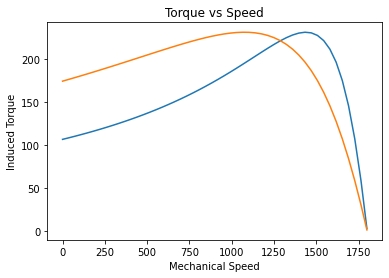

In [73]:
# plotting the points 
plt.plot(nm, t_ind1)
plt.plot(nm, t_ind2)
  
# x axis
plt.xlabel('Mechanical Speed')

# y axis
plt.ylabel('Induced Torque')
  
# title 
plt.title('Torque vs Speed')
  
# function to show the plot
plt.show()

### Here the orange line represents doubled rotor resistance and blue line represents original rotor resistance